# Programming Homework #2

학번 : 2017111299

이름 : 이혜원

---


## 1. csv 파일을 통해 비행기 탑승 승객 리스트를 ID, Survival, Class, Gender, Age 순으로 수치화하여 데이터를 만드세요.

타이타닉 생존자 데이터(출처 : https://www.kaggle.com/c/titanic/data?select=train.csv )를 가공하여 활용하고자 합니다.

### 1. 데이터 가져오기

In [1]:
import pandas as pd

#데이터 불러오기
data_orignal = pd.read_csv("datasets/passenger.csv")

In [2]:
data_orignal.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 데이터 추출 및 정제

In [3]:
#특정 열 추출
data = data_orignal[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age']]

#기존 컬럼(특성)명 변경
data = data.rename({'PassengerId':'ID', 
                    'Survived':'Survival', 
                    'Pclass':'Class', 
                    'Sex':'Gender'
                   }, axis='columns')

#데이터 정제 : 각 특성 중에 결측값(Nan)이 있는 데이터 제거
data = data.dropna()

In [4]:
data.head()

,ID,Survival,Class,Gender,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


### 3. 데이터 수치화 (+정수로만 표현하기)

In [5]:
#male:True, female:False 로 변환
data[['Gender']] = (data[['Gender']] == 'male')

#ID,Survival,Class,Gender,Age 모두 정수(int)로 형변환
data = data.astype(int)

In [6]:
data.head()

,ID,Survival,Class,Gender,Age
0,1,0,3,1,22
1,2,1,1,0,38
2,3,1,3,0,26
3,4,1,1,0,35
4,5,0,3,1,35


### 4. 데이터 요약 정보 (np.linspace 범위에 참고하기)

In [7]:
data.describe()

,ID,Survival,Class,Gender,Age
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.634454,29.679272
std,259.119524,0.491460,0.838250,0.481921,14.536483
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.000000
50%,445.000000,0.000000,2.000000,1.000000,28.000000
75%,677.750000,1.000000,3.000000,1.000000,38.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000


---

## 사이킷런을 사용해 로지스틱회귀를 실행하여 Class, Gender, Age 각각을 기반으로 생존을 예측하는 분류기를 만들고, 추정 확률과 결정 경계를 그림 4-23과 같이 출력하세요.

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

import numpy as np
import matplotlib.pyplot as plt

def logistic(x_name):
    X = data[[x_name]]
    y = data['Survival'] #생존:0, 사망:1
    
    #모델 훈련
    log_reg.fit(X, y)
    
    x_min = min(data[x_name])
    x_max = max(data[x_name])
    X_new = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
    y_proba = log_reg.predict_proba(X_new)
    
    #그래프
    plt.plot(X_new, y_proba[:, 1], "k-", linewidth=2, label="death")
    plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="survival")
    
    #결정 경계
    db = X_new[y_proba[:,0]>=0.5][0]
    if db :
        db_label = "decision boundary = "+ str(db)
        plt.axvline(x=db,color='r', linestyle='--', linewidth=2, label=db_label)

    # 부수적인 그래프 설정
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=15) #범례를 그래프 밖에 배치
    plt.ylabel("Survival", fontsize=18)
    plt.xlabel(x_name, fontsize=18)
    plt.axis([x_min,x_max,0,1])
    plt.show()

### 1~3 클래스의 승객 생존률에 대한 추정 확률 계산

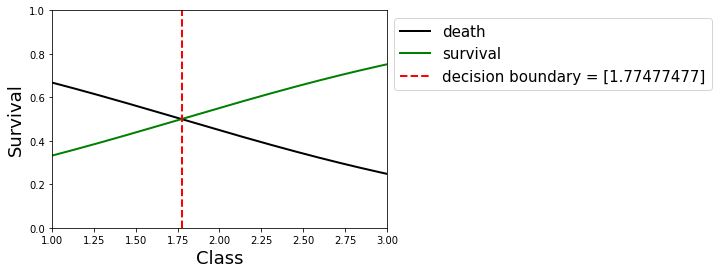

In [9]:
logistic('Class')

결정 경계가 Class가 1.77477477 일 때 그려지고 있어, Class 1.77477477 이상은 생존으로 분류할 수 있습니다. <br>
실제 class는 '1,2,3'이 있어 class 2 이상의 승객은 생존할 것이라고 예측합니다.

### 성별에 따른 생존 확률에 대한 추정 확률 계산

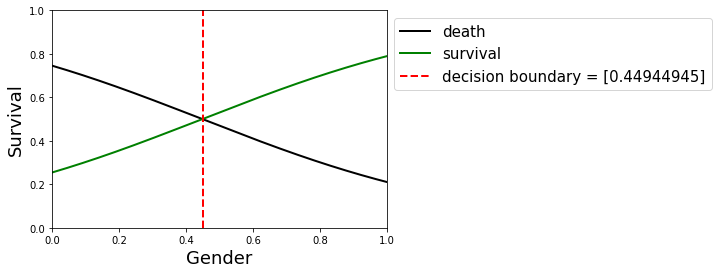

In [10]:
logistic('Gender')

결정 경계가 Gender가 0.44944945 일 때 그려지고 있어, Gender 0.44944945 이상은 생존으로 분류할 수 있습니다. <br>
실제 Gender는 '1:male, 0:female' 이므로 남성 승객은 생존할 것이라고 예측합니다.

### 나이가 0~80인 승객 생존률에 대한 추정 확률 계산

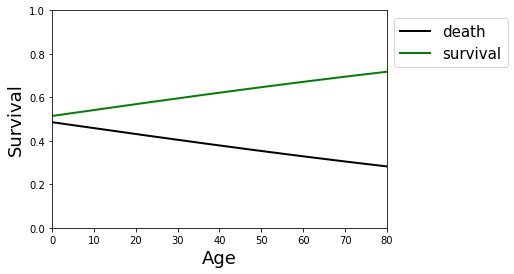

In [11]:
logistic('Age')

범위 0~80 에서 생존에 대한 추정 확률이 모두 50%를 넘어 결정 경계가 보이지 않습니다.<br>
따라서 모두 생존에 속할 것이라고 예측하고 있습니다.